### 11. Feladatsor

Egyszerű PDE-ek numerikus megoldása szemidiszkretizációval.

#### 1. feladat

Tekintsük az alábbi feladatot:
$$
\begin{align*}
u_t(t, x) &= u_{xx}(t, x) \\
\\
u(0, x) &= \sin(\pi x) \\
u(t, 0) &= u(t, 1) = 0
\end{align*}
$$

ahol $ 0 < t < 1, 0 < x < 1$.

a) Szemidiszkretizáljunk (azaz diszkretizáljuk az egyenletet a térváltozó mentén) a véges differenciák módszerével.

In [6]:
% tér-rács
dx = .05;
xs = dx:dx:1 - dx;

n = length(xs);
e = ones(n, 1);

% a szemidiszkretizált egyenlet jobboldalának definíciója
% U'(t) = A * U(t)
A = (1/dx)^2 * spdiags([e -2*e e], [-1 0 1], n, n);
f = @(t, U)(A*U);

b) Válasszunk egy szimpatikus RK/LT módszert, és oldjuk meg a keletkező egyenletet (Meg is gondolhatjuk, hogy az eddig tanultak közül milyen módszert érdemes használni, de az implementáció szempontjából nincs különösebb jelentősége.)

In [7]:
function [ts, ys] = explicit_euler(f, ts, y0)
    ys = zeros(numel(y0), numel(ts));
    ys(:, 1) = y0;
    
    for k=1:(numel(ts) - 1)
        h = ts(k+1) - ts(k);
        ys(:, k+1) = ys(:, k) + h * f(ts(k), ys(:, k));
    end
end

In [8]:
% idő-rács
dt = .001 % figyeljünk arra, hogy dt << dx teljesüljön .. mit tapasztalunk ha ez nem teljesül? mi lehet ennek az oka?
ts = 0:dt:1;
[ts, ys] = explicit_euler(f, 0:dt:1, sin(pi*xs));

dt =  0.0010000


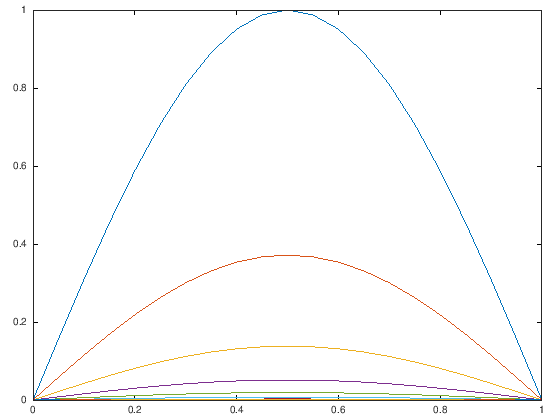

In [9]:
% ys(t_j, x_k) a t_j időpontban, x_k rácspontban felvett értéke a numerikus megoldásnak, azaz ys(t_j, x_k) ~ u(t_j, x_k)

% Ábrázoljuk a megoldást kb. minden 10. időpontban
for j=1:floor((1/dt)/10):length(ts)
    plot([0 xs 1], [0; ys(:, j); 0]); hold on;
end

#### 2. feladat

Tekintsük az alábbi feladatot:
$$
\begin{align*}
u_t(t, x) &= u_{x}(t, x) \\
\\
u(0, x) &= 1 - x^2 \\
u(t, \pm 1) &= 0
\end{align*}
$$

ahol $ 0 < t < 1, -1 < x < 1$.

a) Szemidiszkretizáljunk (azaz diszkretizáljuk az egyenletet a térváltozó mentén) a véges differenciák módszerével.

b) Válasszunk egy szimpatikus RK/LT módszert, és oldjuk meg a keletkező egyenletet.